In [62]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt


    

In [63]:
# Toplam ürün sayısı
toplam_urun_sayisi = 100

# Her sayfada kaç ürün olduğu
sayfa_basina_urun = 20

# Toplam kaç sayfa dolaşılacağı
toplam_sayfa_sayisi = (toplam_urun_sayisi - 1) // sayfa_basina_urun + 1

# Tüm ürün fiyatlarını tutacak liste
fiyat_listesi = []


In [64]:
# Her sayfayı dolaşma
for sayfa_numarasi in range(1, toplam_sayfa_sayisi + 1):
    adres = f'https://www.trendyol.com/cok-satanlar?type=bestSeller&webGenderId=1&page={sayfa_numarasi}'
    baslik = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36'}
    sayfa = requests.get(adres, headers=baslik)
    soup = bs(sayfa.content, features='lxml')

 # Fiyat verilerini alma
    fiyatlar = soup.find_all('div', {'class': 'prc-box-dscntd'})

  # Fiyatları bir listeye ekleyerek DataFrame oluşturma
    for fiyat in fiyatlar:
        fiyat_listesi.append(float(fiyat.text[:-2].replace(",", ".")))  # Fiyatları virgül yerine noktaya çevirerek ekliyoruz

    # Toplam 100 ürüne ulaşıldıysa döngüyü sonlandır
    if len(fiyat_listesi) >= toplam_urun_sayisi:
        break


In [65]:
# DataFrame oluşturma
df = pd.DataFrame(fiyat_listesi, columns=['Fiyat'])

# Veriyi inceleme
print(df)

     Fiyat
0    25.29
1    59.90
2   199.99
3   279.00
4   245.00
..     ...
95   64.89
96  124.00
97  211.00
98  239.28
99  289.90

[100 rows x 1 columns]


In [66]:
# Ortalama fiyatı hesaplama
ortalama_fiyat = df['Fiyat'].mean()
print("Ortalama Fiyat:", ortalama_fiyat)

Ortalama Fiyat: 156.45950000000002


In [67]:
# En yüksek ve en düşük fiyatları bulma
en_yuksek_fiyat = df['Fiyat'].max()
en_dusuk_fiyat = df['Fiyat'].min()

print("En Yüksek Fiyat:", en_yuksek_fiyat)
print("En Düşük Fiyat:", en_dusuk_fiyat)

En Yüksek Fiyat: 449.0
En Düşük Fiyat: 25.29


In [74]:
fiyat_araliklari = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 2000, 3000, 4000, 5000]
fiyat_aralik_isimleri = ['0-49', '50-99', '100-149', '150-199', '200-249', '250-299', '300-349', '350-399', '400-449', '450-499', '500-999', '1000-1999', '2000-2999', '3000-3999', '4000-4999']


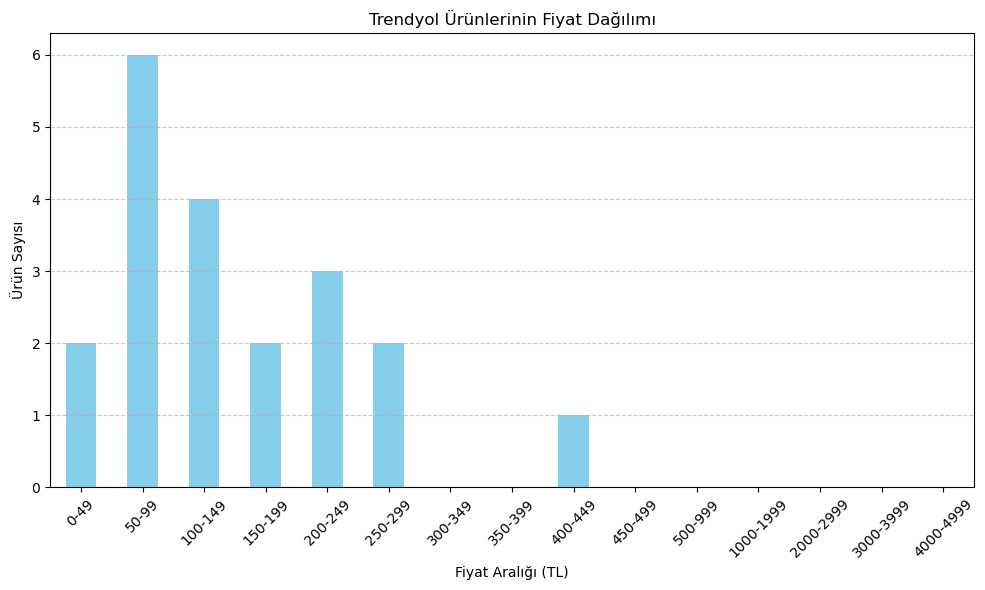

In [75]:
df['Fiyat Aralığı'] = pd.cut(df['Fiyat'], bins=fiyat_araliklari, labels=fiyat_aralik_isimleri, right=False)
fiyat_dagilimi = df['Fiyat Aralığı'].value_counts().sort_index()

# Fiyat dağılımını görselleştirme
plt.figure(figsize=(10, 6))
fiyat_dagilimi.plot(kind='bar', color='skyblue')
plt.title('Trendyol Ürünlerinin Fiyat Dağılımı')
plt.xlabel('Fiyat Aralığı (TL)')
plt.ylabel('Ürün Sayısı')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
